# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten, LSTM,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Flatten, Input, concatenate, Conv1D, GlobalMaxPooling1D,SimpleRNN

# Dataset

In [3]:
filePath = 'D:\\New folder\\Emotion_final.csv'
df = pd.read_csv(filePath)
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [5]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [6]:
category = pd.get_dummies(df.Emotion)
df1 = pd.concat([df, category], axis=1)
df1 = df1.drop(columns='Emotion')

# Data Preprocessing

In [7]:
X = df1['Text'].values
y = df1[['happy', 'sadness', 'anger', 'fear', 'love', 'surprise']].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
tokenizer = Tokenizer(num_words = 5000, oov_token='<x>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

Seq_train = tokenizer.texts_to_sequences(X_train)
Seq_test = tokenizer.texts_to_sequences(X_test)

Pad_train = pad_sequences(Seq_train)
Pad_test = pad_sequences(Seq_test)

# Build The Model

In [13]:
model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 128)),
model.add(SimpleRNN(128,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(16,activation='relu'))
model.add (Dropout(0.3))
model.add(Dense(6))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

# Train The Model

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    Pad_train, y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (Pad_test, y_test),
    verbose = 1,
)

Epoch 1/60
68/68 [==============================] - 4s 45ms/step - loss: 1.6892 - accuracy: 0.3031 - val_loss: 1.5551 - val_accuracy: 0.3220
Epoch 2/60
68/68 [==============================] - 3s 41ms/step - loss: 1.5312 - accuracy: 0.3368 - val_loss: 1.3287 - val_accuracy: 0.3935
Epoch 3/60
68/68 [==============================] - 3s 41ms/step - loss: 1.3126 - accuracy: 0.4154 - val_loss: 1.2121 - val_accuracy: 0.5084
Epoch 4/60
68/68 [==============================] - 3s 41ms/step - loss: 1.0517 - accuracy: 0.5829 - val_loss: 0.8720 - val_accuracy: 0.6594
Epoch 5/60
68/68 [==============================] - 3s 44ms/step - loss: 0.8103 - accuracy: 0.6768 - val_loss: 0.8118 - val_accuracy: 0.6729
Epoch 6/60
68/68 [==============================] - 3s 46ms/step - loss: 0.6809 - accuracy: 0.7103 - val_loss: 0.6443 - val_accuracy: 0.7116
Epoch 7/60
68/68 [==============================] - 3s 46ms/step - loss: 0.5917 - accuracy: 0.7283 - val_loss: 0.7144 - val_accuracy: 0.6922
Epoch 8/60
68

# Plot The Graph

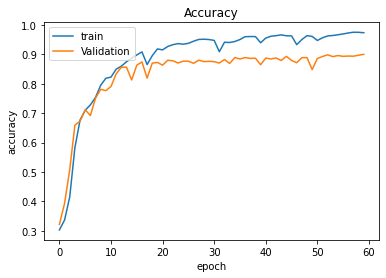

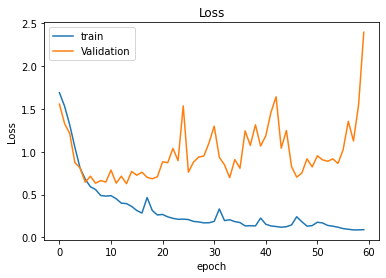

In [20]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()